# 1.神经网络的前馈计算：
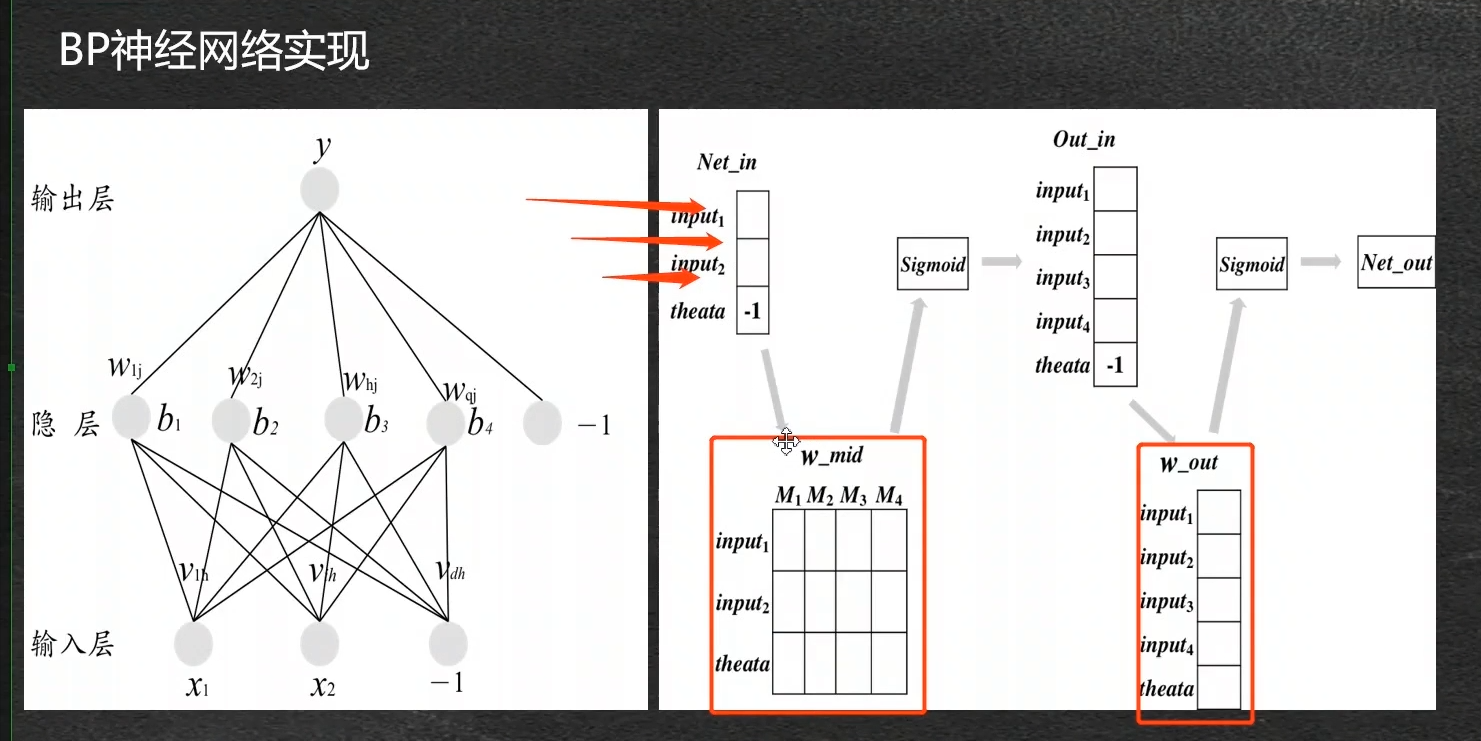

##  各个变量的意义
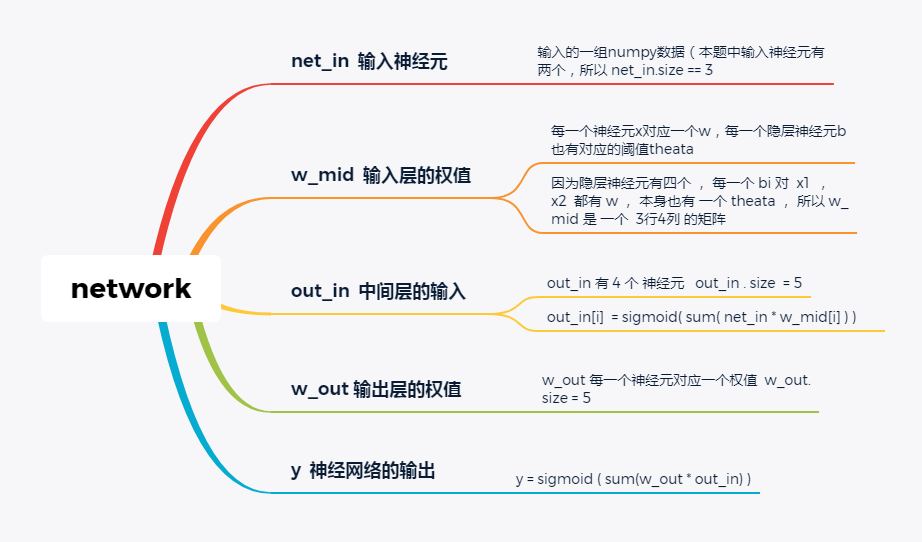

# 2.神经网络的后馈计算：


## w_mid 与 w_out  的权值与theata的修正函数
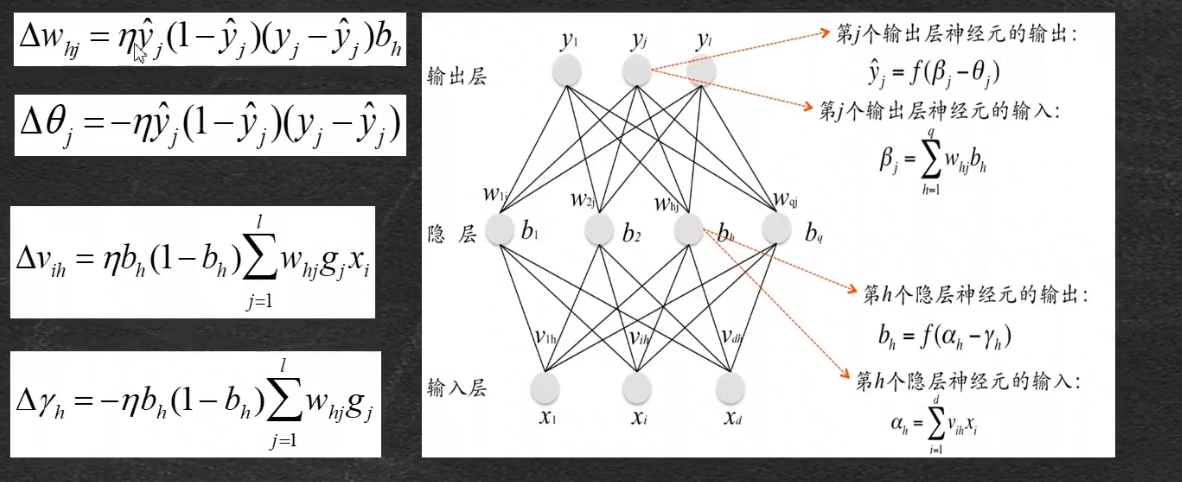
 


 
## gi 的 计算公式
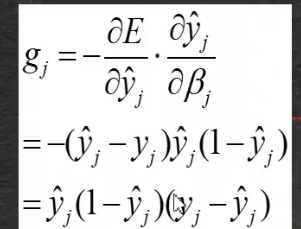


## 代码思路流程图：
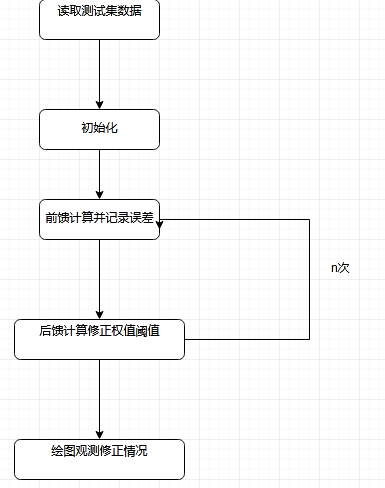

#  3.模型训练：

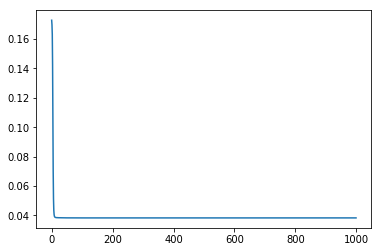

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):  # 网络激活函数
    return 1/(1 + np.exp(-x))   

data_tr = pd.read_csv('data/BPdata_tr.txt')  # 以 pd.DataFrame 的形式读入 数据
data_te = pd.read_csv('data/BPdata_te.txt')

n = len(data_tr)  # n  数据量
yita = 0.85#1.5 # 学习速率 

net_in = np.array([0.0499853495508432, 0.334657078469172, -1]) #网络输入
out_in = np.array([0.0,0.,0.,0.,-1])

real = 0.114493895339242

w_mid = np.zeros((3,4)) #中间层 权值&阈值
w_out = np.zeros(5)     #输出层 权值&阈值

delta_w_out = np.zeros(5)   # 输出层权值&阈值的修正量   
delta_w_mid = np.zeros((3,4))  # 中间层权值&阈值的修正量

#-----------------------------------------以上全为 init ----------------------------------------------------------------
Err = []
for k in range(1000): 
    
    error = []
    for it in range(n):  #  n个 样本数据  走一遍   ，都来 修正一下  w_mid  w_out  

        net_in = np.array([data_tr.iloc[it,0], data_tr.iloc[it,1], -1]) # 网络输入 
        real = data_tr.iloc[it,2]

#         print(it,' 个样本次训练的模型输出： res: ',res, 'real: ',real)

        # first of all  
        # 进行前馈训练 计算 根据  w_mid  w_out  神经网络
        for i in range(4):
            out_in[i] = sigmoid(sum(net_in * w_mid[:,i]))    # 从输入层到隐层的传输过程

        res = sigmoid(sum(out_in * w_out))  # 得到模型的预测值
        
        error.append(abs(res-real))
        # print(abs(res-real))
        # second  后馈 修正 w_out w_mid 值
        delta_w_out = yita*res*(1-res)*(real-res)*out_in  # 输出层权值的修正量
        delta_w_out[4] = -yita*res*(1-res)*(real-res)  # 输出层阈值的修正量

        # print(w_out)
        w_out = w_out + delta_w_out

        for i in range(4):
            delta_w_mid[:,i] = yita*out_in[i]*(1-out_in[i])*w_out[i]*res*(1-res)*(real-res)*net_in # 中间层神经元的权值修正量
            delta_w_mid[2,i] = -yita*out_in[i]*(1-out_in[i])*w_out[i]*res*(1-res)*(real-res) # 中间层神经元的阈值修正量


        w_mid = w_mid + delta_w_mid 
    #     print(res,real)
    #     print(abs(res-real))
    # print(w_out)
    Err.append(np.mean(error))  #将 测试集数据 每一轮 修正后 误差的均值给 记录下来
    
    
# print(error)
plt.plot(Err)
plt.show()   

In [43]:
print(len(error))

500


# 4.测试集进行模型评估：

将 data_tr  训练集训练好的 w_mid w_out 进行 data_te 测试集测试

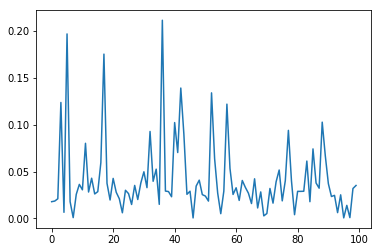

0.041591045991


In [45]:
error_te = []

for it in range(len(data_te)):
        
        net_in = np.array([data_te.iloc[it,0], data_te.iloc[it,1], -1]) # 网络输入 
        real = data_te.iloc[it,2]

        #  print(it,' 个样本次训练的模型输出： res: ',res, 'real: ',real)

        # first of all  
        # 进行前馈训练 计算 根据  w_mid  w_out  神经网络
        for i in range(4):
            out_in[i] = sigmoid(sum(net_in * w_mid[:,i]))    # 从输入层到隐层的传输过程

        res = sigmoid(sum(out_in * w_out))  # 得到模型的预测值
        
        error_te.append(abs(res-real))

plt.plot(error_te)
plt.show()
plt.close()

# 模型的好与坏   绝对值误差的平均值
print(np.mean(error_te))